In [1]:
import pandas as pd

removed_columns = ['date','view', 'sqft_above', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15','waterfront','id','sqft_basement']
df = pd.read_csv('data/kc_house_data.csv').drop(removed_columns, axis = 'columns')

In [2]:
df.isna().sum()

price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
condition          0
grade              0
yr_built           0
yr_renovated    3842
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21597 non-null  float64
 1   bedrooms      21597 non-null  int64  
 2   bathrooms     21597 non-null  float64
 3   sqft_living   21597 non-null  int64  
 4   sqft_lot      21597 non-null  int64  
 5   floors        21597 non-null  float64
 6   condition     21597 non-null  object 
 7   grade         21597 non-null  object 
 8   yr_built      21597 non-null  int64  
 9   yr_renovated  17755 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 1.6+ MB


In [49]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,17755.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676,83.636778
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234,399.946414
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000,2015.000000


## Creating a Linear Model around sqft_living and price

In [18]:
from sklearn import linear_model

#Initialize model
regression_model = linear_model.LinearRegression()

#train the model
regression_model.fit(X=pd.DataFrame(df['sqft_living']), y=df['price'])

#check trained model y-intercept and coefficient and score
print('y-intercept: ', regression_model.intercept_)
print('coefficient: ', regression_model.coef_)
print('R-Squared:   ', regression_model.score(X=pd.DataFrame(df['sqft_living']), y=df['price']))

y-intercept:  -43988.89219422708
coefficient:  [280.86301436]
R-Squared:    0.49268789904035093


In [19]:
train_prediction = regression_model.predict(X = pd.DataFrame(df['sqft_living']))

#Actual - prediction = residuals

residuals = df['price'] - train_prediction
residuals.describe()

count    2.159700e+04
mean     6.521511e-11
std      2.616611e+05
min     -1.478896e+06
25%     -1.475833e+05
50%     -2.413133e+04
75%      1.062741e+05
max      4.359590e+06
Name: price, dtype: float64

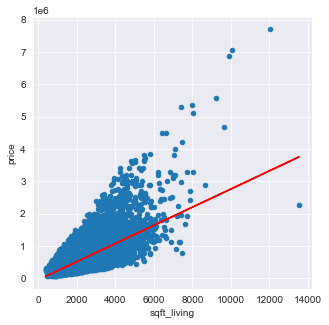

In [10]:
#scatterplot of sqft_living vs price
df.plot(kind='scatter', x='sqft_living', y='price', figsize=(5,5))

#best fit line from regression
plt.plot(df['sqft_living'], #explanatory variable
         train_prediction,  #predicted values
         color='r'
        );

In [11]:
poly_model = linear_model.LinearRegression()

#Create dataframe of predictors
predictors = pd.DataFrame([df['sqft_living'], df['sqft_living']**2]).T

#Train the model using the new data
poly_model.fit(X = predictors, y = df['price'])

#trained model y-intercept
print('model intercept: ', poly_model.intercept_)

#traiend model coefficients (scaling factor given to 'price')
print('model coefficients: ', poly_model.coef_)

#R-Squared
print('model r-squared: ', poly_model.score(X=predictors, y=df['price']))

model intercept:  199186.19231633574
model coefficients:  [6.80072924e+01 3.86091745e-02]
model r-squared:  0.5325573147123217


In [62]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#OLS
outcome = 'price'
#Remove some categorical data
predictors = df.drop(['price', 'condition', 'grade', 'yr_renovated', 'yr_built'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     4472.
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:41:19   Log-Likelihood:            -2.9972e+05
No. Observations:               21597   AIC:                         5.994e+05
Df Residuals:                   21591   BIC:                         5.995e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.189e+04   7724.061     10.602      0.000    6.67e+04     9.7e+04
bedrooms    -6.023e+04   2362.967    -25.489      0.000   -6.49e+04   -5.56e+04
bathrooms    6495.0460   3826.882      1.697      0.090   -1005.926     1.4e+04
sqft_living   315.1567      3.147    100.145      0.000     308.988     321.325
sqft_lot       -0.3816      0.043     -8.822      0.000      -0.466      -0.297
floors      -1357.2156   3784.923     -0.359      0.720   -8775.944    6061.513
==============================================================================
Omnibus:                    14321.136   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           478630.529
Skew:                           2.713   Prob(JB):                         0.00
Kurtosis:                      25.415   Cond. No.                     2.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
from sklearn.linear_model import LinearRegression

y = df['price']
linreg = LinearRegression()
linreg.fit(predictors, y)

LinearRegression()

In [67]:
linreg.coef_

array([-6.02307802e+04,  6.49504604e+03,  3.15156663e+02, -3.81616120e-01,
       -1.35721559e+03])

In [68]:
linreg.intercept_

81887.34664137731

In [69]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df)

X = df.drop(['price'], axis=1)
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [72]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated
4391,3,3.00,2010,2554,2.0,Average,7 Average,2001,0.0
4047,3,1.00,1040,7490,1.0,Average,7 Average,1969,0.0
904,3,1.75,1250,6041,1.5,Very Good,7 Average,1942,0.0
10756,4,2.50,2670,5895,2.0,Average,8 Good,1999,0.0
11520,5,2.75,2930,31411,1.0,Good,9 Better,1975,0.0
...,...,...,...,...,...,...,...,...,...
11566,2,2.00,1300,2983,1.0,Average,8 Good,2006,0.0
5638,5,2.75,2844,3990,2.0,Average,8 Good,2013,0.0
18202,5,2.25,2520,49222,2.0,Good,8 Good,1978,0.0
11312,2,2.50,1860,6359,2.0,Average,7 Average,2003,NaN


## Train Test

In [50]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y= df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

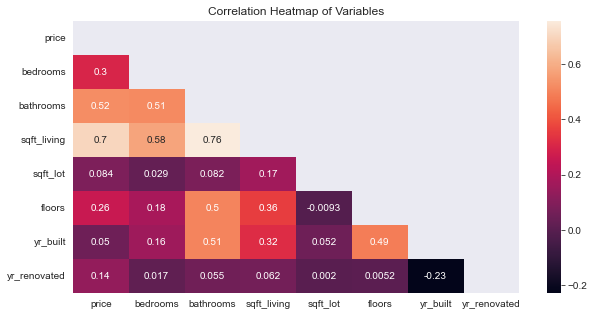

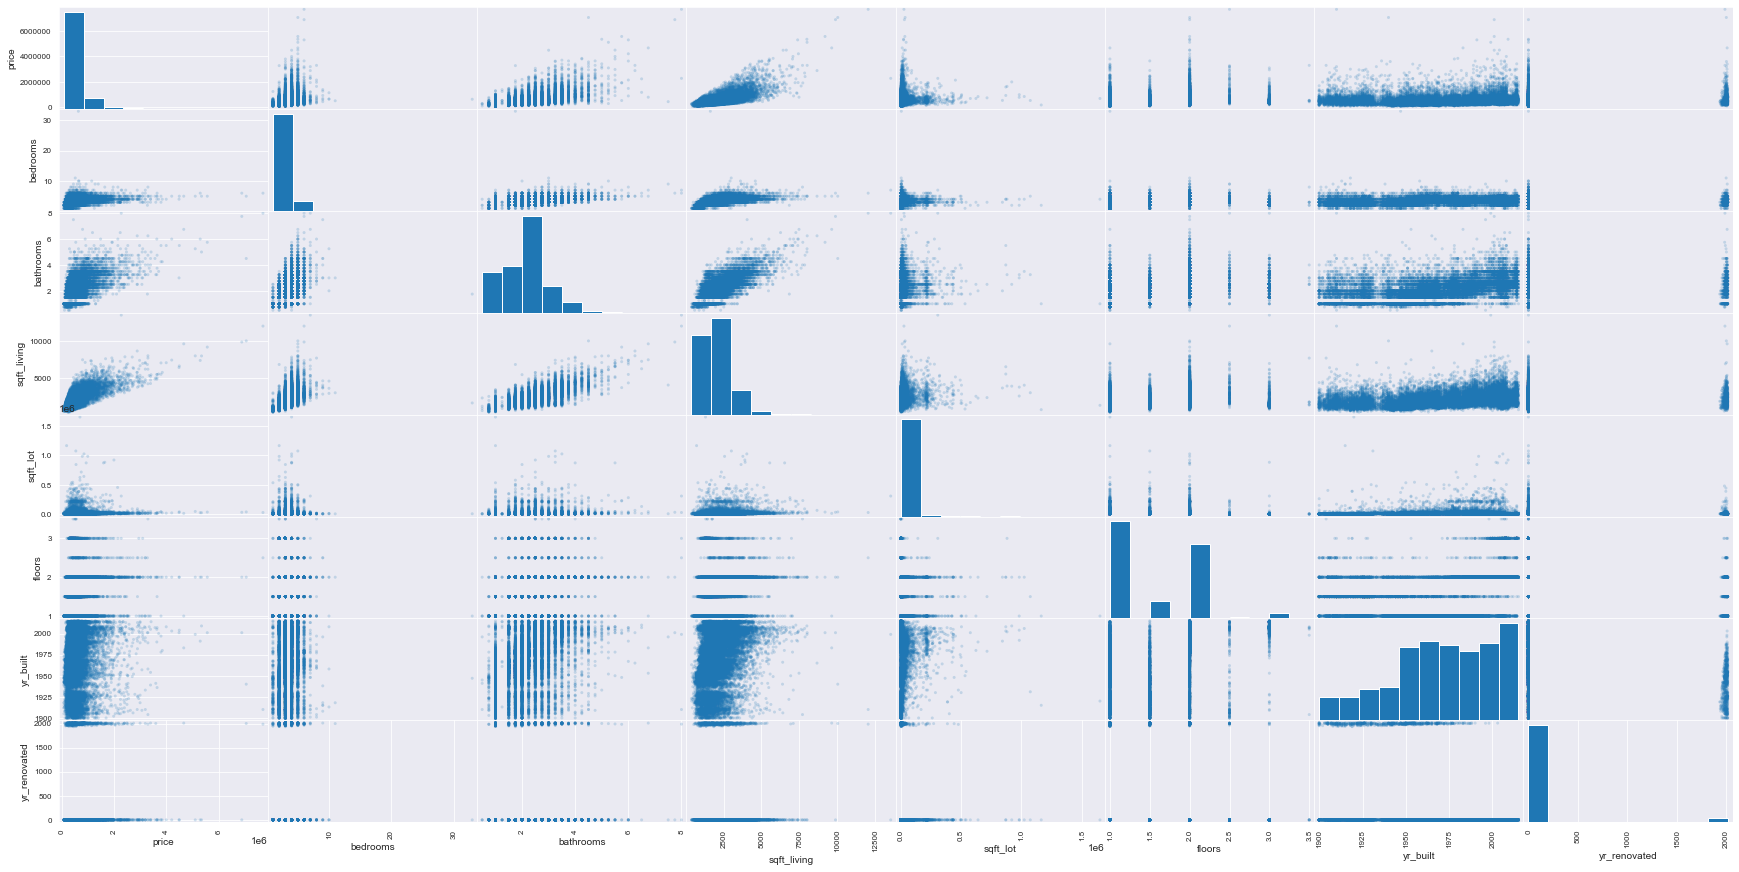

In [51]:
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np

#heatmap to show multicollinearity
heatmap_df = pd.concat([y_train, X_train], axis=1)
corr = heatmap_df.corr()

fig, ax = plt.subplots(figsize = (10,5))

sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr,dtype=bool)),
    ax=ax,
    annot=True
)

ax.set_title('Correlation Heatmap of Variables')

#visualization of multicollinearity of predictor variables
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(30,15));

In [52]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated
1130,3,2.50,3000,8250,1.0,Good,8 Good,1963,0.0
4600,4,2.50,2590,7910,2.0,Average,9 Better,2001,0.0
13464,2,2.00,2280,641203,2.0,Average,9 Better,1990,0.0
18542,4,2.00,2340,50233,1.0,Good,7 Average,1966,0.0
6817,3,2.00,1890,12017,1.0,Average,8 Good,1949,0.0
...,...,...,...,...,...,...,...,...,...
10955,3,2.25,2420,7548,1.0,Good,8 Good,1967,0.0
17289,3,1.50,1060,5750,1.0,Fair,7 Average,1981,0.0
5192,3,1.75,1540,13002,1.0,Fair,8 Good,1984,0.0
12172,3,2.50,2420,49928,2.0,Average,8 Good,1985,0.0


In [53]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated
16729,3,1.75,1210,8864,1.0,Average,7 Average,1985,0.0
10996,4,1.00,1190,7920,1.0,Average,6 Low Average,1951,NaN
12089,2,2.25,1550,1824,2.0,Average,8 Good,2007,0.0
554,3,1.50,1300,8280,1.0,Very Good,7 Average,1956,0.0
16075,4,2.75,2420,7102,1.0,Very Good,7 Average,1946,0.0
...,...,...,...,...,...,...,...,...,...
12711,3,1.00,1100,5100,1.0,Good,7 Average,1913,NaN
3456,4,2.50,3000,10920,1.0,Good,8 Good,1969,0.0
15338,4,2.50,2910,9131,2.0,Average,10 Very Good,2014,NaN
13235,4,2.25,2130,8078,1.0,Good,7 Average,1977,0.0


In [48]:
X_test.value_counts()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade          yr_built  yr_renovated
5         2.50       2170         2752      2.0     Average    8 Good         2014      0.0             2
6         1.75       2230         10080     1.0     Average    7 Average      1969      0.0             2
3         3.00       1390         1080      2.0     Average    7 Average      2006      0.0             2
          2.25       1960         1985      2.0     Average    7 Average      2003      0.0             2
          2.50       2370         4200      2.0     Average    8 Good         2014      0.0             2
                                                                                                       ..
          1.75       2090         7461      1.0     Average    6 Low Average  1986      0.0             1
                                  7505      1.0     Average    7 Average      1967      0.0             1
                                  12026     1.0    

In [46]:
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

#separating data into continuous and categorical variables
continuous = ['sqft_living', 'sqft_lot']
categoricals = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'yr_built', 'yr_renovated']

#Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse=False)

#Fit transformers
log_transformer.fit(X_train[continuous])
ohe.fit(X_train[categoricals])

#Transform Train data
X_train = pd.concat([
    pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
    pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
], axis=1)

#Transform Test data
X_test = pd.concat([
    pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
    pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
], axis=1)

ValueError: Found unknown categories [10] in column 0 during transform